## Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Alunas: Marilia Meister e Maria Natalia

Professor: Leonardo Hoinaski

Abrindo planilha de fatores de emissões compilada.
Nosso empreendimento é a Porto Bello, do ramo de revestiemnto cerâmico. Portanto usamos o capítulo 11.7 da AP42 https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf

ETAPA 1 - Planilhar em arquivo .csv os fatores de emissão para cada processo do seu empreendimento (linhas) e para cada poluente (colunas).

In [5]:
import pandas as pd              #Importa a biblioteca pandas as pd
import os                        #Importa a biblioteca os

cwd = os.getcwd()                # cwd recebe o endereço do script

path = cwd+'\\tabelas\\FE'      #path recebe o endereço onde está o arquivo do fatores de emissão
print(path)                     #imprime o path para verificação

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file )
display(fe)

#OBS.: Os dados já estão convertidos para a unidade [kg/ton]

C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\FE
chp_11_7.csv


,Source,PM,SO2,NOX
0,BMP,0.0600,NaN,NaN
1,Secador,1.1500,NaN,NaN
2,Resfriador,0.0550,NaN,NaN
3,Granulacao,0.0950,NaN,NaN
4,Queima,0.2450,104.5,0.27
5,Refrigeracao,0.0335,NaN,NaN
6,Esmaltacao,0.0950,NaN,NaN


ETAPA 2- Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

1
2
3


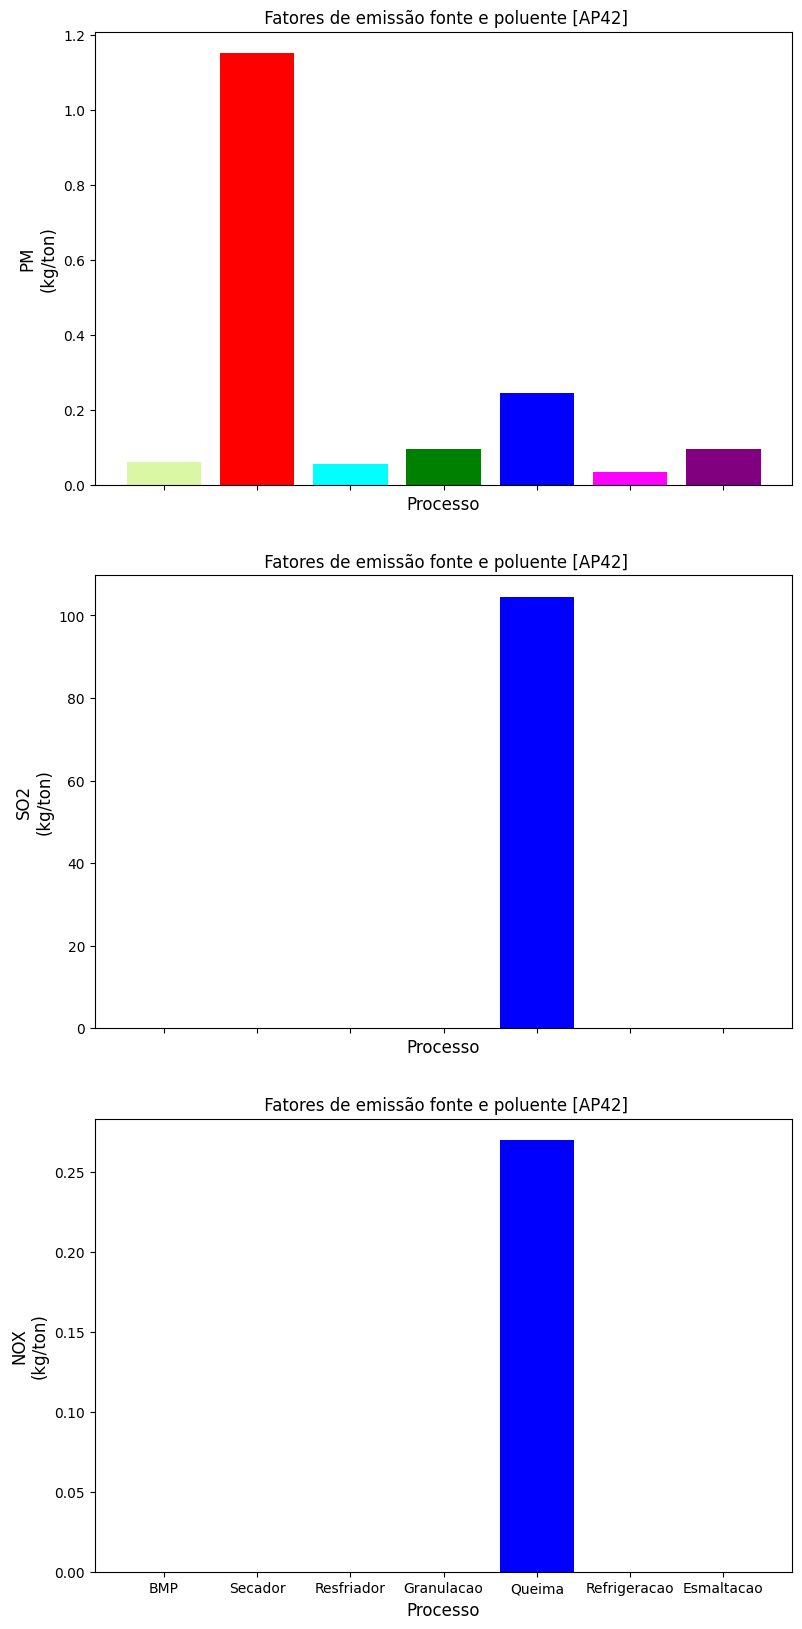

In [6]:
#Função para ler a Planilha de fatores de Emissão
import matplotlib.pyplot as plt                                           #criar visualizações gráficas, como gráficos e plots.

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 20))  #Essa linha de código está preparando a estrutura para plotar os dados de cada 
                                                                          #poluente em um subplot separado, todos compartilhando o mesmo eixo x.

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):                                       # Este loop for itera sobre os númer os de 1 até o número de COLUNAS em fe (len(fe.columns)). O uso de range(1, len(fe.columns)) exclui a primeira coluna 
    print(ii)                                                              
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan', 'green', 'blue', 'magenta','purple'])
    ax[ii-1].set_xlabel('Processo', fontsize=12)                          #fontsize=12 é um argumento usado para definir o tamanho da fonte
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=12)
    ax[ii-1].set_title(' Fatores de emissão fonte e poluente [AP42]', fontsize=12)

#Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

Estimando a emissão com base na taxa de atividade do empreendimento. 
Nesta sessão nós determinamos uma taxa de atividade [ton/s] da empresa Porto Bello, com base na produção do ano de 2023
(Produção de 26.000.000 m² de cerâmica produzida no ano de 2023). A conversão da mesma está detalhada no relatório. 


In [15]:
# Definindo a taxa de atividade em [ton/s]
ativ = 0.000717948

#Definindo a função para a estimativa da emissão, essa sera usada novamente na etapa 4
#Multiplicando as colunas de fe [kg/ton] pela atividade [ton/s]
emissao_mp = (fe['PM']*ativ)*1000     # [g/s]       
emissao_so2 = (fe['SO2']*ativ)*1000   # [g/s]
emissao_nox = (fe['NOX']*ativ)*1000  # [g/s]

ETAPA 3- Elaborar uma função para criar uma variabilidade na taxa de atividade do empreendimento, com 
componentes aleatória e sazonal (com base nas dadas do ano de 2023).

In [8]:
#Nesta seção é criado um DataFrame com frequencia horária e a variabilidade da taxa do empreendimento
import pandas as pd
import numpy as np

# Criando um intervalo de datas de 2023 com resolução horária
Datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criando um DataFrame com as datas
df = pd.DataFrame({'Datas': Datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Datas'].dt.month

# Extrair os semanas das datas e adicioná-los como uma nova coluna no DataFrame
# Criando valor da semana 
sem = np.full(len(df),1)
for i in range(167,8760,168):
    sem[i:] += 1
df['Semana'] = sem

# Criando vetor de valores aleatórios
import numpy as np
atvMax = ativ*0.7        #[ton/s] (Considerou-se que a atvMax é 70% da atividade total anteriormente definida)
atvMin = ativ*0.3        #[ton/s] (Considerou-se que a atvMin é 30% da atividade total anteriormente definida)

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
ativ_ale = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['Atividade [ton/s]'] = ativ_ale   #[ton/s]

# Mostrar o DataFrame resultante
df.set_index('Datas',inplace=True)
display(df)

,Mes,Semana,Atividade [ton/s]
Datas,,,
2023-01-01 00:00:00,1,1,0.000325
2023-01-01 01:00:00,1,1,0.000345
2023-01-01 02:00:00,1,1,0.000395
2023-01-01 03:00:00,1,1,0.000294
2023-01-01 04:00:00,1,1,0.000417
...,...,...,...
2023-12-30 20:00:00,12,52,0.000496
2023-12-30 21:00:00,12,52,0.000454
2023-12-30 22:00:00,12,52,0.000250


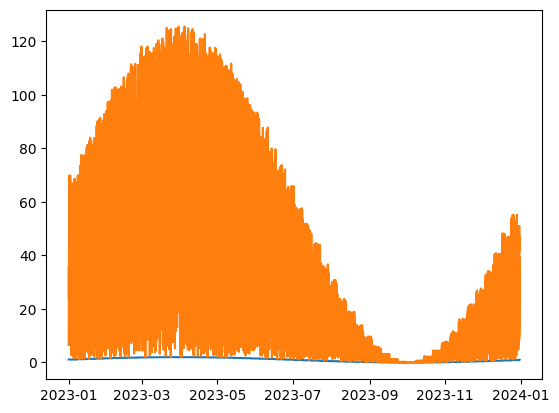

In [37]:
#Nesta seção é definido a componente de sazonalidade

#Importando bliblioteca plt
import matplotlib.pyplot as plt

df['Sazonalidade'] = (np.sin(2* np.pi * df['Semana'] / 53)) + 1  #somando 1 no final para não termos produção negativa. 53 representa as 53 semnas no ano 
                                                              

min_producao_hora = 0               #considerando que pode haver dias sem produção [ton/h]
max_producao_hora = 62.030715068     #produção máxima possível em uma hora. [ton/h] considerando que a capacidade máxima é de 45.000.000 m^2/ano, esse foi o valor encontrado para ton/h

variabilidade = (np.random.uniform(min_producao_hora, max_producao_hora, len(df)))+1

df['Variabilidade'] = variabilidade
df['Producao_Diaria [ton/h]'] = df['Sazonalidade']*df['Variabilidade']

plt.plot(df['Sazonalidade'])
plt.plot(df['Producao_Diaria [ton/h]'])
df
df.to_csv(r"C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\ativPortoBello.csv")

ETAPA 4 - Estimar as emissões com a função criada em 2  com os dados de entrada criados em 3.

In [60]:
#ESTIMANDO EMISSÃO
#Multiplicando as colunas de fe [kg/ton] pela atividade [ton/s]
#Somando a atividade aleatória calculada anteriormente
atv_ale = int(df['Atividade [ton/s]'].sum()) #[ton/s]

#Emissões 
emi_mp = (fe['PM']*atv_ale)*1000   # [g/s]       
emi_so2 = (fe['SO2']*atv_ale)*1000   # [g/s]
emi_nox = (fe['NOX']*atv_ale)*1000  # [g/s]

# Criar um novo DataFrame com as emissões calculadas
em = pd.DataFrame({
    'Source': fe['Source'],
    'Emissao_MP [g/s]': emi_mp.astype(int),
    'Emissao_SO2 [g/s]': emi_so2,
    'Emissao_NOX [g/s]': emi_nox
})

display(emissoes)     #Mostra as emissões totais por processo
emissoes.to_csv(r"C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\emissoesPortoBello.csv")

,Source,Emissao_MP [g/s],Emissao_SO2 [g/s],Emissao_NOX [g/s]
0,BMP,180.0,NaN,NaN
1,Secador,3450.0,NaN,NaN
2,Resfriador,165.0,NaN,NaN
3,Granulacao,285.0,NaN,NaN
4,Queima,735.0,313500.0,810.0
5,Refrigeracao,100.5,NaN,NaN
6,Esmaltacao,285.0,NaN,NaN


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

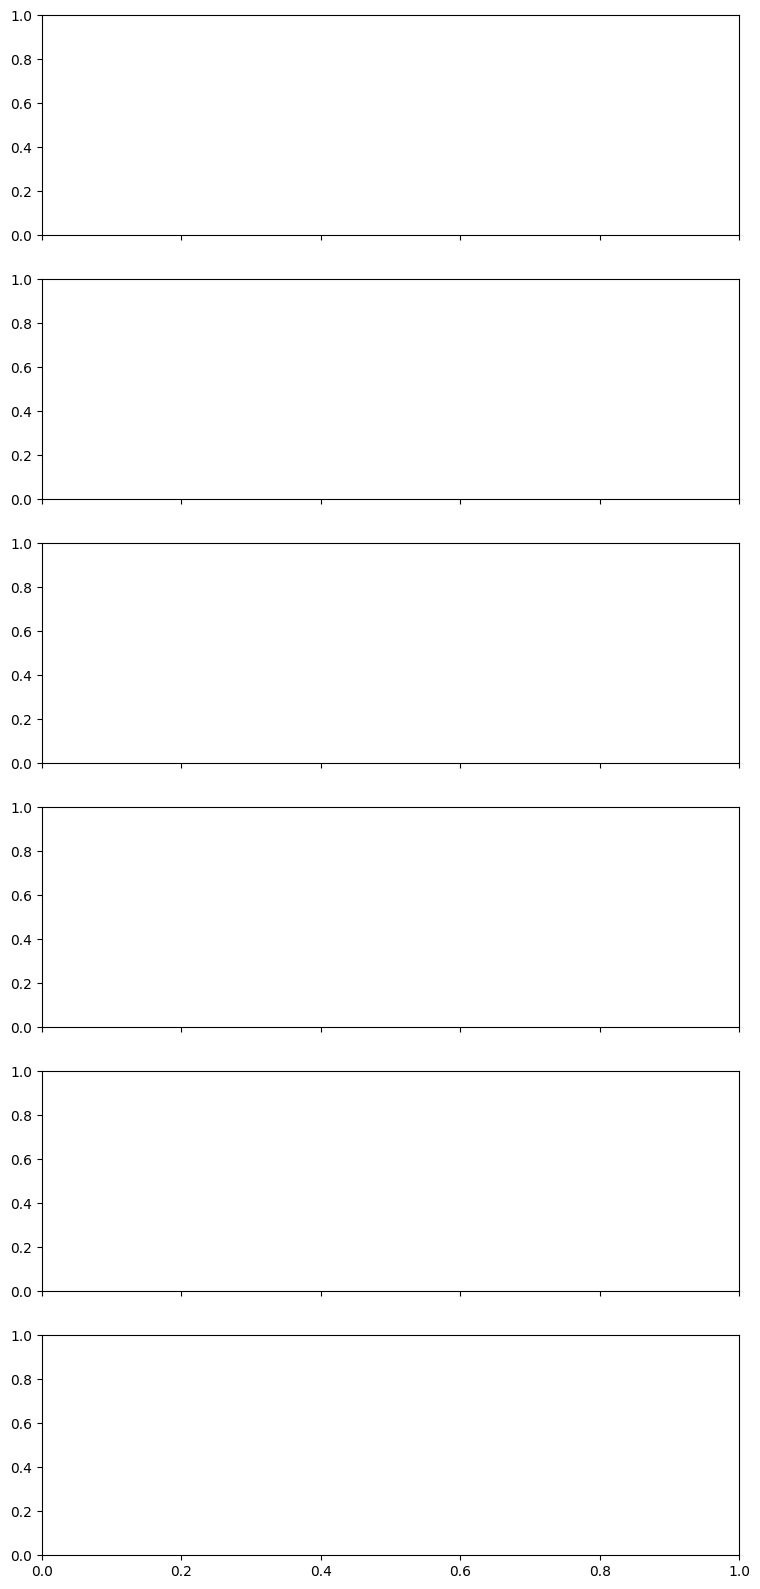

In [67]:
#Plotando os gráficos de atividades totais por processo
#-----------------------------Plotar o gráfico de barras para MP---------------------------------------------------------------------


#plt.figure(figsize=(8,9))
fig,em = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 20))
barras = plt.bar(em['Source'], em['Emissao_MP [g/s]'], color='skyblue')


# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')


plt.xlabel('Source')
plt.ylabel('MP [g/s]')
plt.title('Emissões totais de MP em 2023')
plt.xticks(rotation=90)                      # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()                           # Ajustar o layout para evitar cortes
plt.show()
#-----------------------------Plotar o gráfico de barras para SO---------------------------------------------------------------------

plt.figure(figsize=(8,9))
barras = plt.bar(em['Source'], em['Emissao_SO2 [g/s]'], color='skyblue')


# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')


plt.xlabel('Source')
plt.ylabel('SO [g/s]')
plt.title('Emissões totais de MP em 2023')
plt.xticks(rotation=90)                      # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()                           # Ajustar o layout para evitar cortes
plt.show()